In [3]:
# The packages we need to load are tidyverse, repr, and tidymodels. We have done so below.
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
library("ggplot2")
library("GGally")

In [4]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv"
download.file(url, destfile = "heart_failure.csv")

heart_failure <- read_csv("heart_failure.csv")
heart_failure

Parsed with column specification:
cols(
  age = col_double(),
  anaemia = col_double(),
  creatinine_phosphokinase = col_double(),
  diabetes = col_double(),
  ejection_fraction = col_double(),
  high_blood_pressure = col_double(),
  platelets = col_double(),
  serum_creatinine = col_double(),
  serum_sodium = col_double(),
  sex = col_double(),
  smoking = col_double(),
  time = col_double(),
  DEATH_EVENT = col_double()
)



age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
75,0,582,0,20,1,265000,1.9,130,1,0,4,1
55,0,7861,0,38,0,263358,1.1,136,1,0,6,1
65,0,146,0,20,0,162000,1.3,129,1,1,7,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,0,2060,1,60,0,742000,0.8,138,0,0,278,0
45,0,2413,0,38,0,140000,1.4,140,1,1,280,0
50,0,196,0,45,0,395000,1.6,136,1,1,285,0


In [5]:
heart_failure <- heart_failure %>%
            mutate(anaemia = as_factor(anaemia),
                   diabetes = as_factor(diabetes),
                   sex = as_factor(sex),
                   high_blood_pressure = as_factor(high_blood_pressure),
                   smoking = as_factor(smoking),
                   DEATH_EVENT = as_factor(DEATH_EVENT))

# # ASK TA IF THERE IS A SHORTER WAY TO DO THE TASK BELOW
# # Changed the values as shown below to make the data more comprehensible and easy to explain. 0s and 1s can be hard to 
# understand what 0 means and what 1 means. 


levels(heart_failure$anaemia) <- c("no", "yes")
levels(heart_failure$diabetes) <- c("no", "yes")
levels(heart_failure$sex) <- c("female", "male")
levels(heart_failure$high_blood_pressure) <- c("no", "yes")
levels(heart_failure$smoking) <- c("no", "yes")
levels(heart_failure$DEATH_EVENT) <- c("no", "yes")

# #levels(heart_failure$anaemia$diabetes$high_blood_pressure$smoking$DEATH_EVENT) <- c("no", "yes")


heart_failure

age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>
75,no,582,no,20,yes,265000,1.9,130,male,no,4,yes
55,no,7861,no,38,no,263358,1.1,136,male,no,6,yes
65,no,146,no,20,no,162000,1.3,129,male,yes,7,yes
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,no,2060,yes,60,no,742000,0.8,138,female,no,278,no
45,no,2413,no,38,no,140000,1.4,140,male,yes,280,no
50,no,196,no,45,no,395000,1.6,136,male,yes,285,no


In [6]:
# To see the NA values in the data set I used the is.na() and using the sum function I got the number of NA values in the data set. Since the sum
# is 0, that means there are no NA values in the data set. 

sum(is.na(heart_failure))

[1] 0

In [7]:
set.seed(20)
heart_failure_split <- initial_split(heart_failure, prop = 0.80, strata = DEATH_EVENT)
heart_failure_train <- training(heart_failure_split)
heart_failure_test <- testing(heart_failure_split)

heart_failure_train



age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>
75,no,582,no,20,yes,265000,1.9,130,male,no,4,yes
65,no,146,no,20,no,162000,1.3,129,male,yes,7,yes
50,yes,111,no,20,no,210000,1.9,137,male,no,7,yes
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,no,2060,yes,60,no,742000,0.8,138,female,no,278,no
45,no,2413,no,38,no,140000,1.4,140,male,yes,280,no
50,no,196,no,45,no,395000,1.6,136,male,yes,285,no


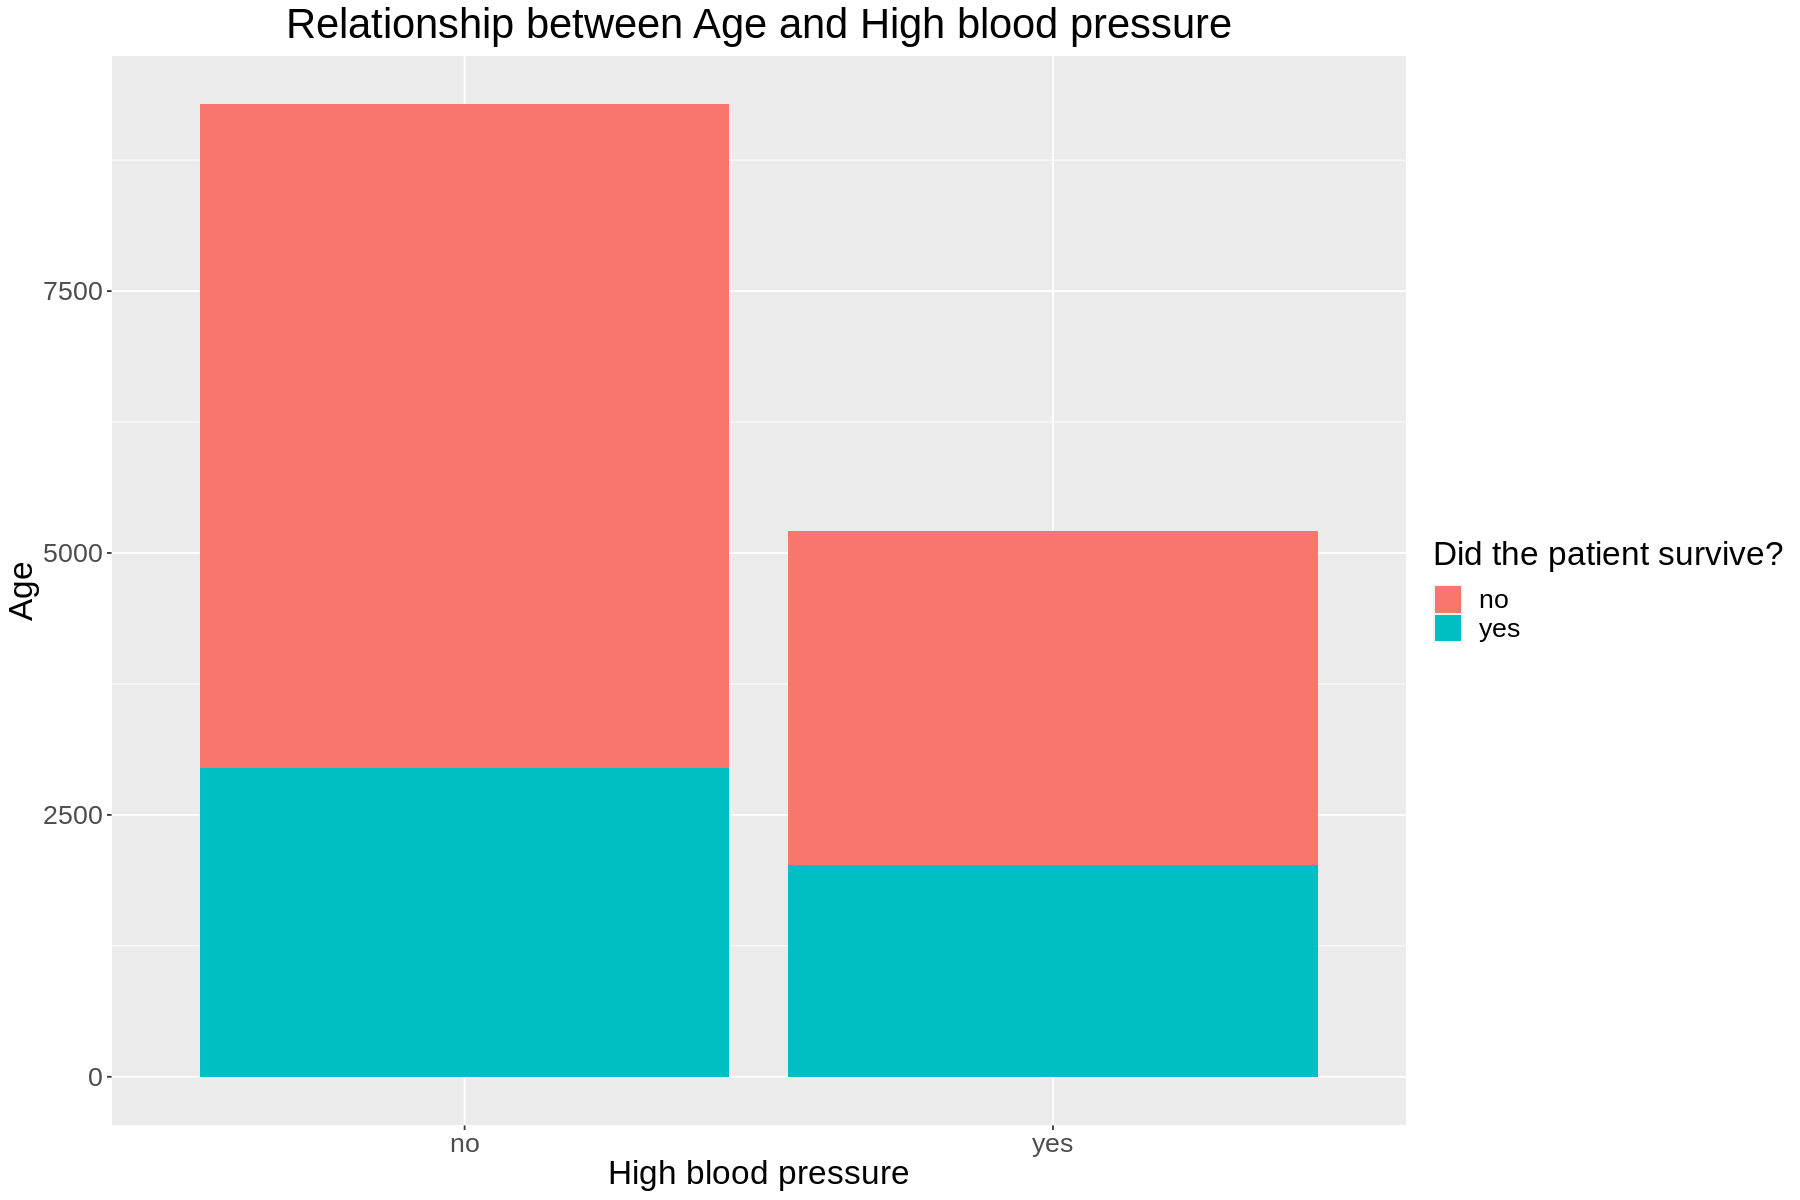

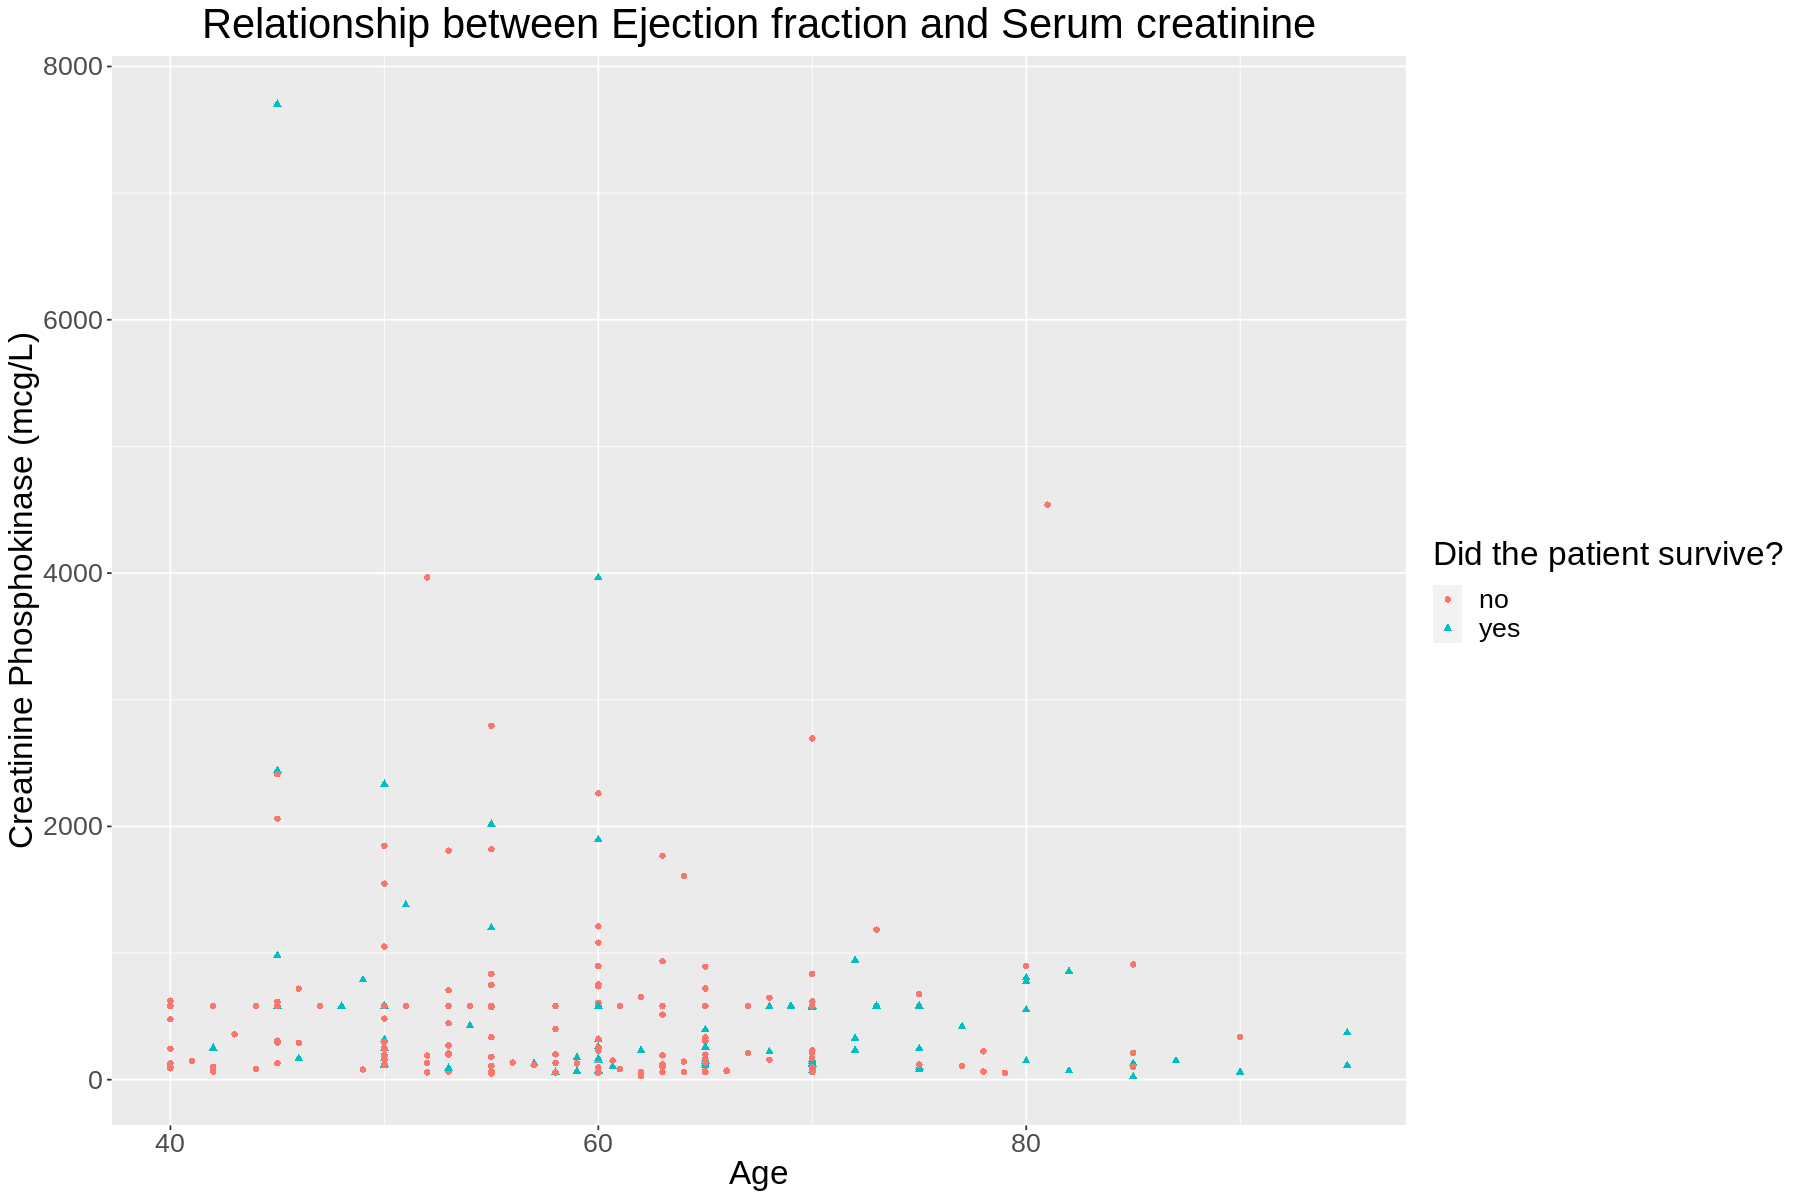

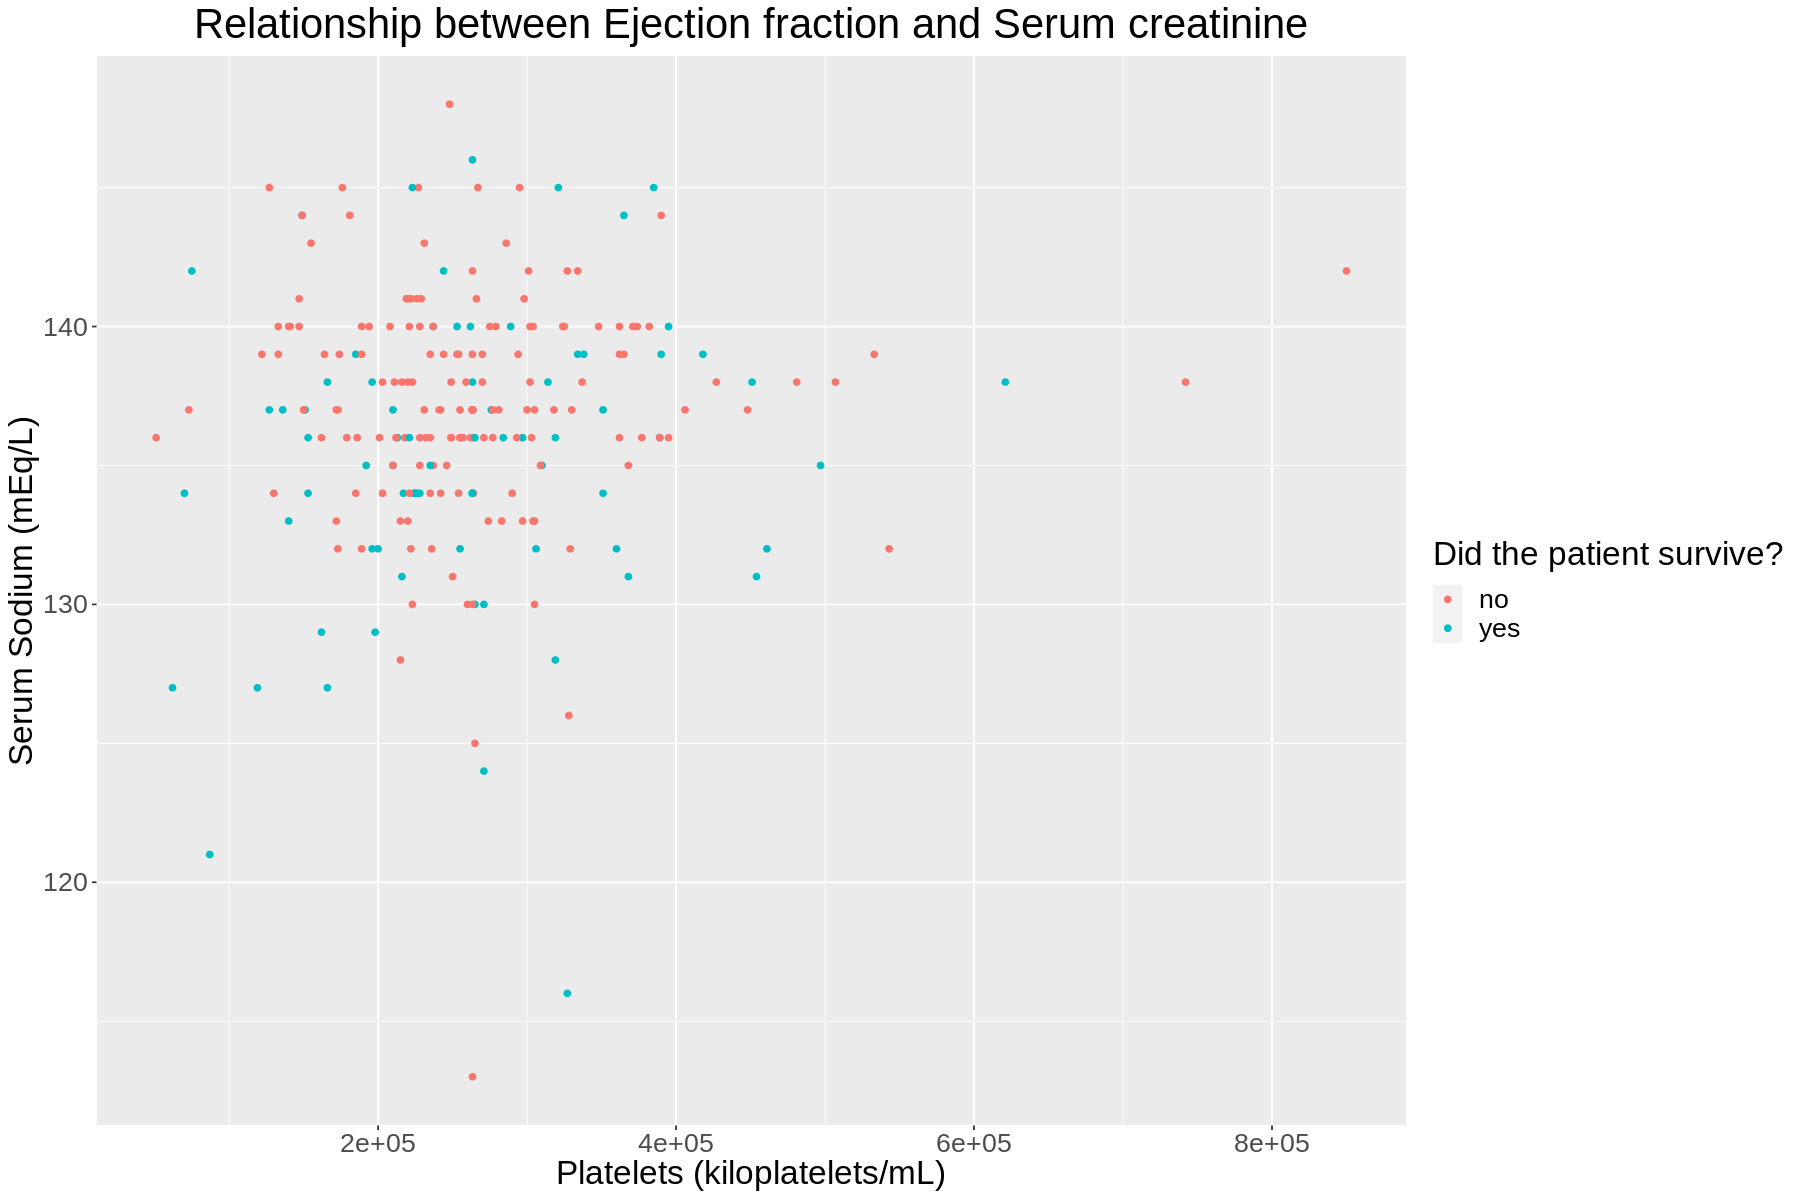

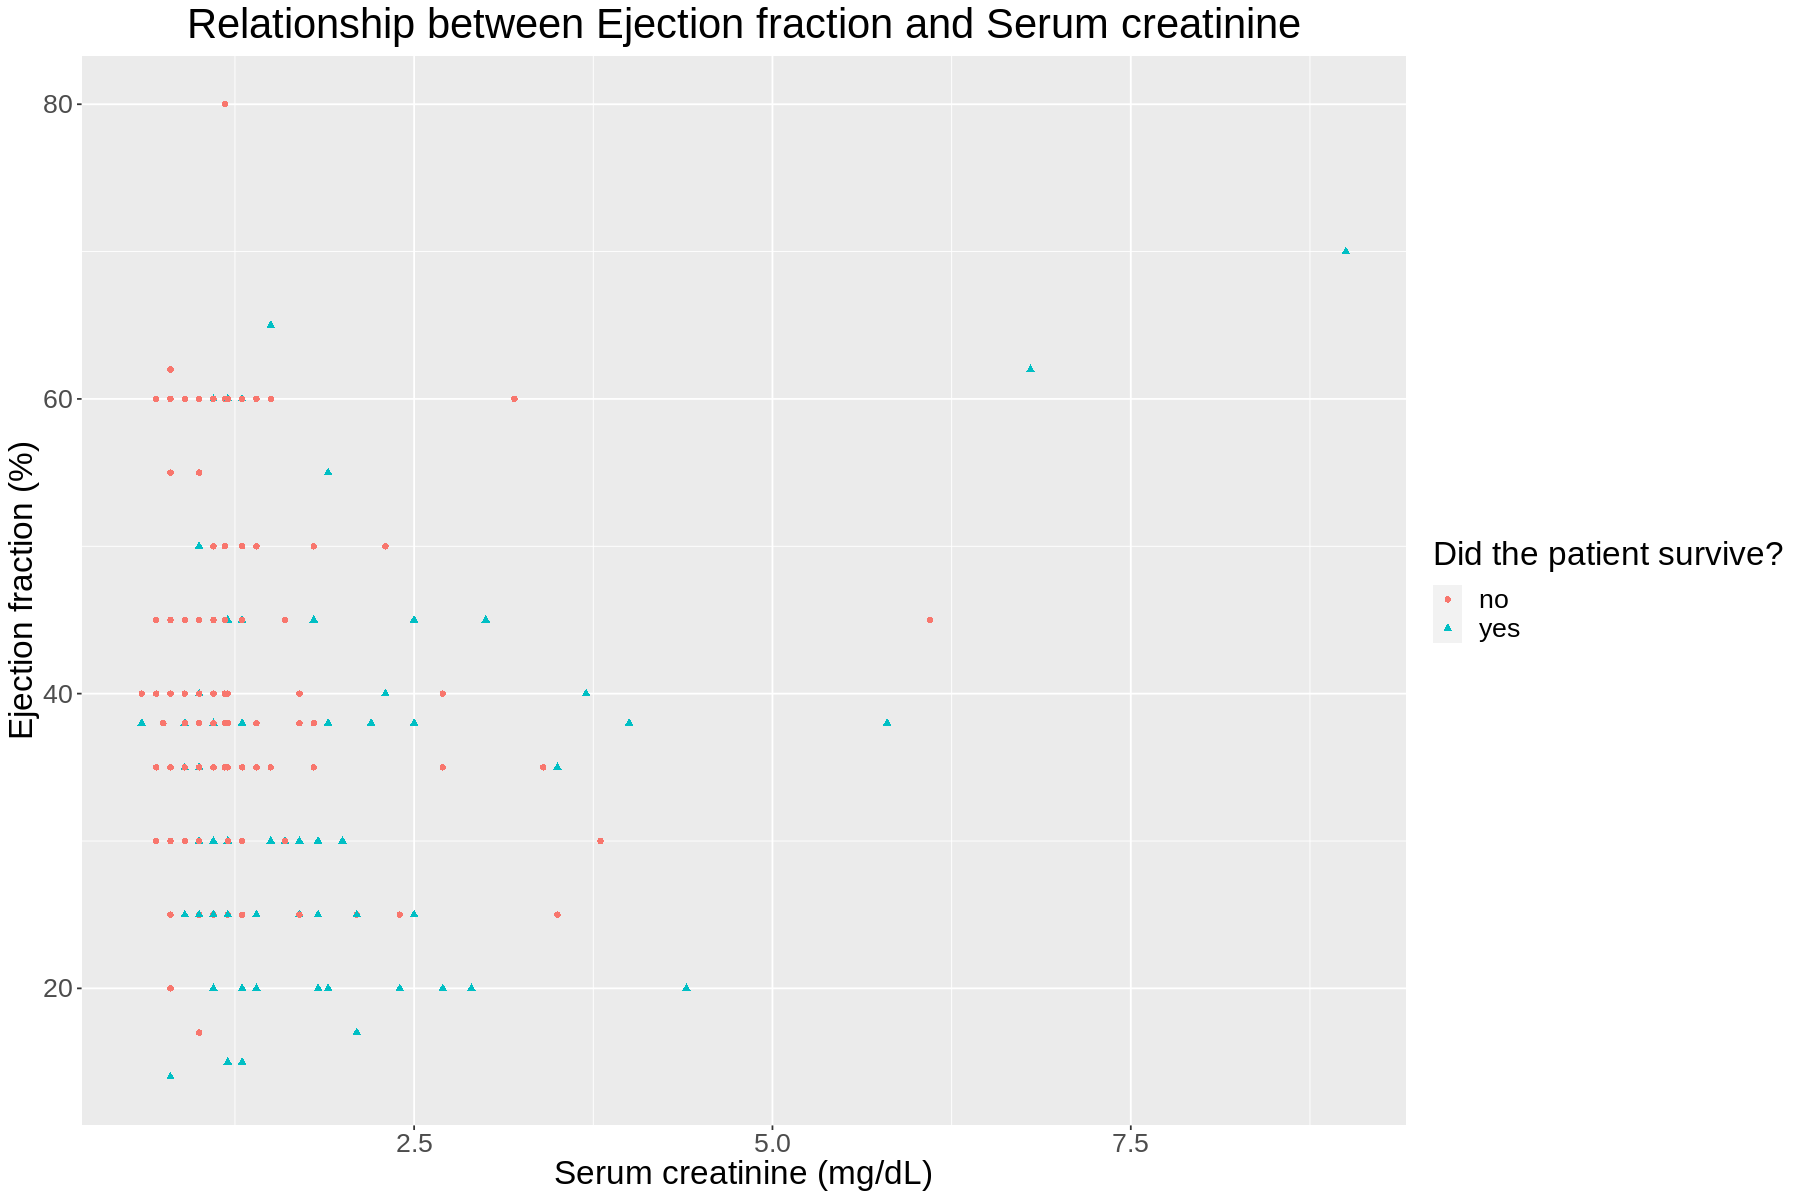

In [8]:
set.seed(20)

# ASK TA HOW TO ADD AN ABLINE

# ASK TA ABOUT THE STRENGTH AND LINEARITY OF GRAPH

# WE can see from the graph below that a patient with a higher Ejection fraction and lower Serum creatinine had a higher survival
# results compared to a patient with lower Ejection fraction and higher Serum creatinine. Therefore there is an inverse
# relationship between Ejection fraction and Serum creatinine.


options(repr.plot.width = 15, repr.plot.height = 10)



bp_vs_age_plot <- heart_failure_train %>%
                ggplot(aes(y = age, x = high_blood_pressure, fill = DEATH_EVENT))+
                geom_bar(stat = "identity") +
                labs(x = "High blood pressure", y = "Age", fill = "Did the patient survive?") +
                theme(text = element_text(size = 20)) +
                ggtitle("Relationship between Age and High blood pressure") +
                theme(plot.title = element_text(hjust = 0.5, size = 25))


bp_vs_age_plot


cp_vs_age_plot <- heart_failure_train %>%
                ggplot(aes(x = age, y = creatinine_phosphokinase, colour = DEATH_EVENT, shape =  DEATH_EVENT))+
                geom_point() +
                labs(x = "Age", y = "Creatinine Phosphokinase (mcg/L)", colour = "Did the patient survive?",
                    shape = "Did the patient survive?") +
                theme(text = element_text(size = 20)) +
                ggtitle("Relationship between Ejection fraction and Serum creatinine") +
                theme(plot.title = element_text(hjust = 0.5, size = 25))


cp_vs_age_plot


ss_vs_pl_plot <- heart_failure_train %>%
                ggplot(aes(x = platelets, y = serum_sodium, colour = DEATH_EVENT))+
                geom_point() +
                labs(x = "Platelets (kiloplatelets/mL)", y = "Serum Sodium (mEq/L)", colour = "Did the patient survive?") +
                theme(text = element_text(size = 20)) +
                ggtitle("Relationship between Ejection fraction and Serum creatinine") +
                theme(plot.title = element_text(hjust = 0.5, size = 25))


ss_vs_pl_plot


options(repr.plot.width = 15, repr.plot.height = 10)


ef_vs_sc_plot <- heart_failure_train %>%
                ggplot(aes(x = serum_creatinine, y = ejection_fraction, colour = DEATH_EVENT, shape =  DEATH_EVENT))+
                geom_point() +
                labs(x = "Serum creatinine (mg/dL)", y = "Ejection fraction (%)", colour = "Did the patient survive?",
                    shape = "Did the patient survive?") +
                theme(text = element_text(size = 20)) +
                ggtitle("Relationship between Ejection fraction and Serum creatinine") +
                theme(plot.title = element_text(hjust = 0.5, size = 25))

ef_vs_sc_plot

In [9]:
# We will now extract the columns that will be most important for our analysis and provide us the most accuracy in our prediction. 
# Our predictors are ejection_fraction, serum_creatinine, and time. The outcome is DEATH EVENT.

heart_failure_extracted <- select(heart_failure, ejection_fraction, serum_creatinine, time, DEATH_EVENT)
heart_failure_extracted

ejection_fraction,serum_creatinine,time,DEATH_EVENT
<dbl>,<dbl>,<dbl>,<fct>
20,1.9,4,yes
38,1.1,6,yes
20,1.3,7,yes
⋮,⋮,⋮,⋮
60,0.8,278,no
38,1.4,280,no
45,1.6,285,no


In [10]:
set.seed(20)
# The table below shows that in the training set there are 163 deaths and 77 survivors.
# By the death event column, there are approximately 32.08% positives and 67.92% negatives.  
summarized_train <- heart_failure_train %>%
                    group_by(DEATH_EVENT) %>%
                    summarize(n = n()) %>%
                    mutate(percentate = (n * 100)/nrow(heart_failure_train))

summarized_train

# The table below shows that in the testing set there are 40 deaths and 19 survivors.
# By the death event column, there are approximately 32.20% positives and 67.80% negatives.  

summarized_test <- heart_failure_test %>%
                    group_by(DEATH_EVENT) %>%
                    summarize(n = n()) %>%
                    mutate(percentate = (n * 100)/nrow(heart_failure_test))

summarized_test


`summarise()` ungrouping output (override with `.groups` argument)



DEATH_EVENT,n,percentate
<fct>,<int>,<dbl>
no,163,67.91667
yes,77,32.08333


`summarise()` ungrouping output (override with `.groups` argument)



DEATH_EVENT,n,percentate
<fct>,<int>,<dbl>
no,40,67.79661
yes,19,32.20339


In [11]:
set.seed(20)

# Below is a table of the means of the predictor variables we plan to use:

means_data <- heart_failure_train %>%
              group_by(DEATH_EVENT) %>%
              summarize(ejection_fraction_average = mean(ejection_fraction),
                       serum_creatinine_average = mean(serum_creatinine),
                       time_average = mean(time))

means_data

`summarise()` ungrouping output (override with `.groups` argument)



DEATH_EVENT,ejection_fraction_average,serum_creatinine_average,time_average
<fct>,<dbl>,<dbl>,<dbl>
no,40.87730,1.189387,158.53374
yes,33.19481,1.849091,70.37662


In [12]:
# The number of missing rows in the training data set using the sum() and is.na() function.

sum(is.na(heart_failure_train))

# The value shows the number of missing rows (NA values). In this case since the sum is 0, that means there are no missing values

[1] 0

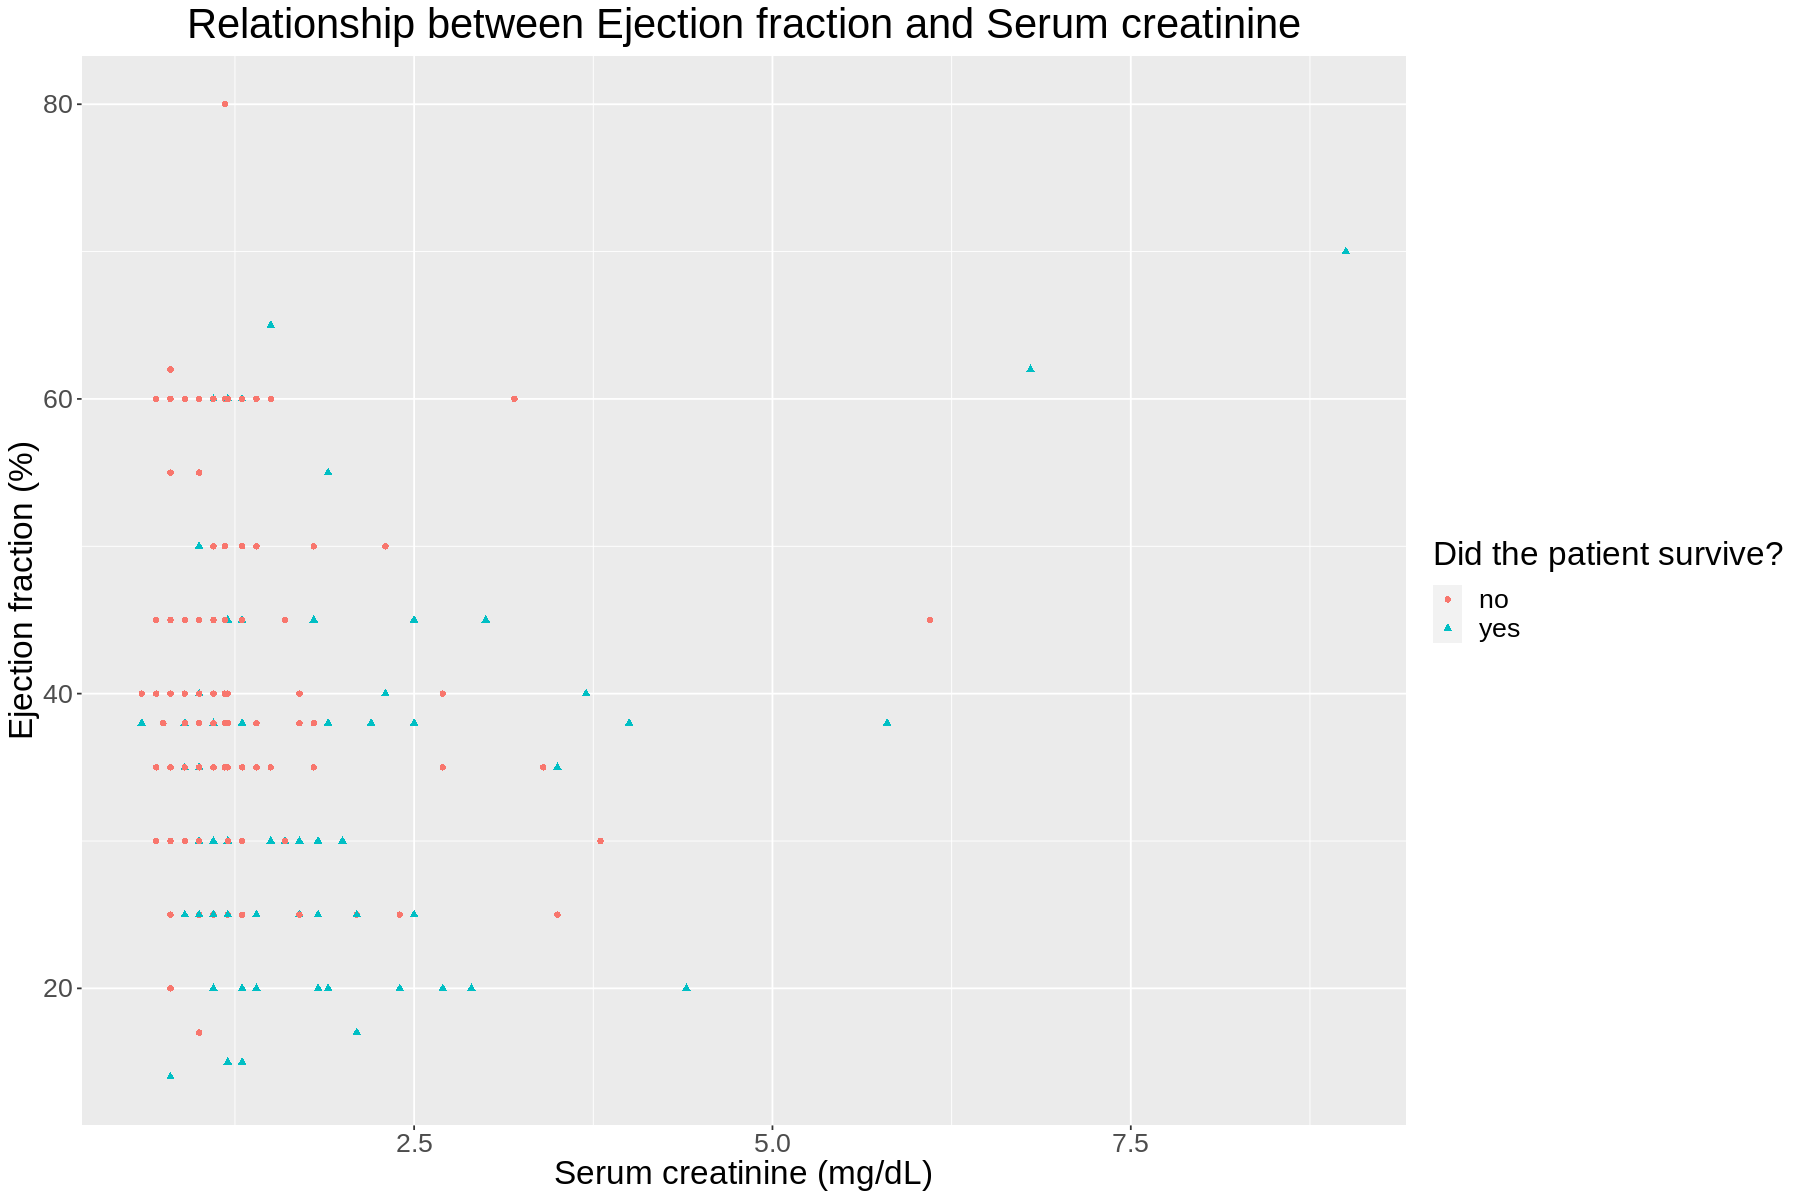

In [13]:
set.seed(20)

# ASK TA HOW TO ADD AN ABLINE

# ASK TA ABOUT THE STRENGTH AND LINEARITY OF GRAPH

# WE can see from the graph below that a patient with a higher Ejection fraction and lower Serum creatinine had a higher survival
# results compared to a patient with lower Ejection fraction and higher Serum creatinine. Therefore there is an inverse
# relationship between Ejection fraction and Serum creatinine.

require(stats)
options(repr.plot.width = 15, repr.plot.height = 10)

z <- lm(ejection_fraction ~ serum_creatinine, data = heart_failure_train)

ef_vs_sc_plot <- heart_failure_train %>%
                ggplot(aes(x = serum_creatinine, y = ejection_fraction, colour = DEATH_EVENT, shape =  DEATH_EVENT))+
                geom_point() +
                labs(x = "Serum creatinine (mg/dL)", y = "Ejection fraction (%)", colour = "Did the patient survive?",
                    shape = "Did the patient survive?") +
                theme(text = element_text(size = 20)) +
                ggtitle("Relationship between Ejection fraction and Serum creatinine") +
                theme(plot.title = element_text(hjust = 0.5, size = 25))

ef_vs_sc_plot




# ef_vs_sc_plot <-  abline(reg = z)



# z <- lm(dist ~ speed, data = cars)
# plot(cars)
# abline(z) # equivalent to abline(reg = z) or
# abline(coef = coef(z))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



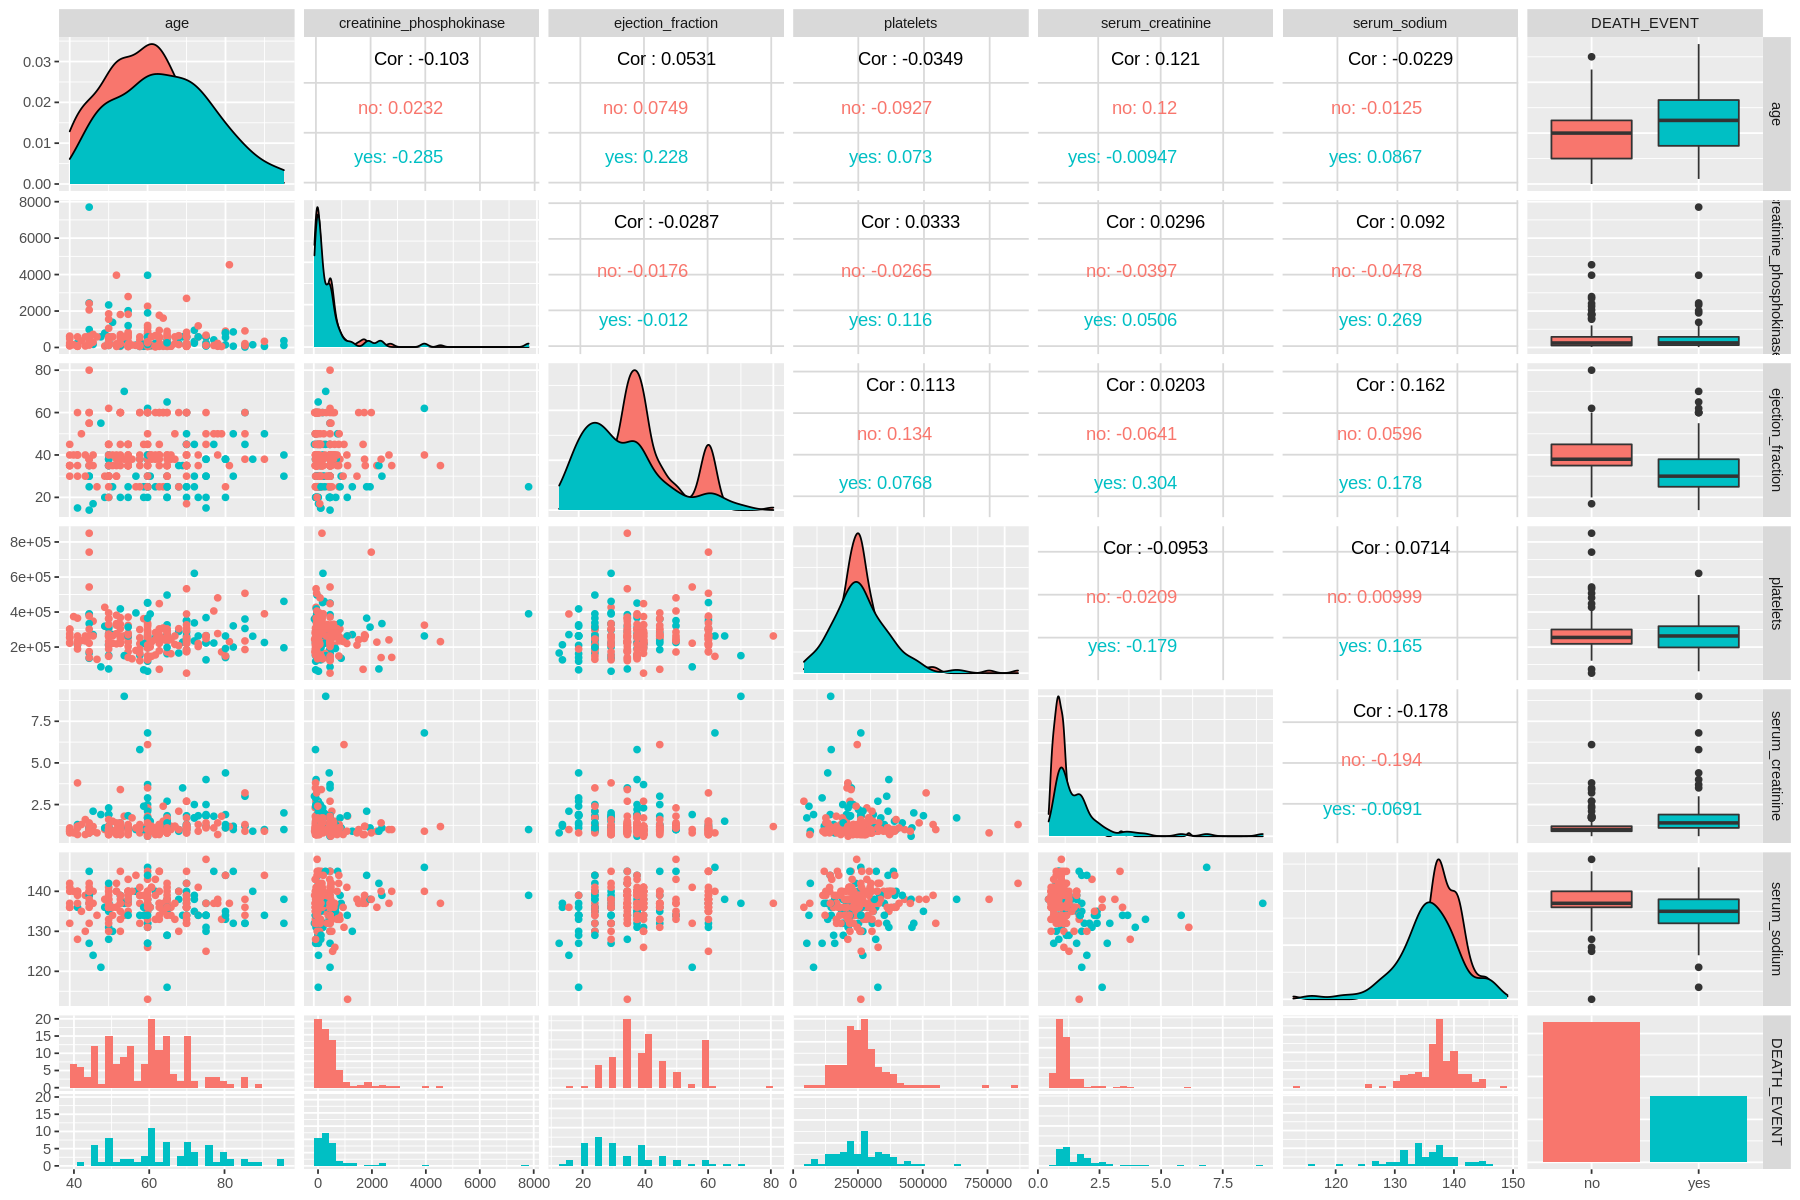

In [18]:

#?ggpairs

#library("GGally")
#data(heart_failure_train)


# heart_failure_select <- heart_failure_train %>% select(serum_creatinine, ejection_fraction, time, DEATH_EVENT)
# ggpairs(heart_failure_select, ggplot2::aes(colour=DEATH_EVENT))

heart_failure_select <- heart_failure_train %>% 
                        select(age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine,
                               serum_sodium, DEATH_EVENT)

ggpairs(heart_failure_select, ggplot2::aes(colour=DEATH_EVENT))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



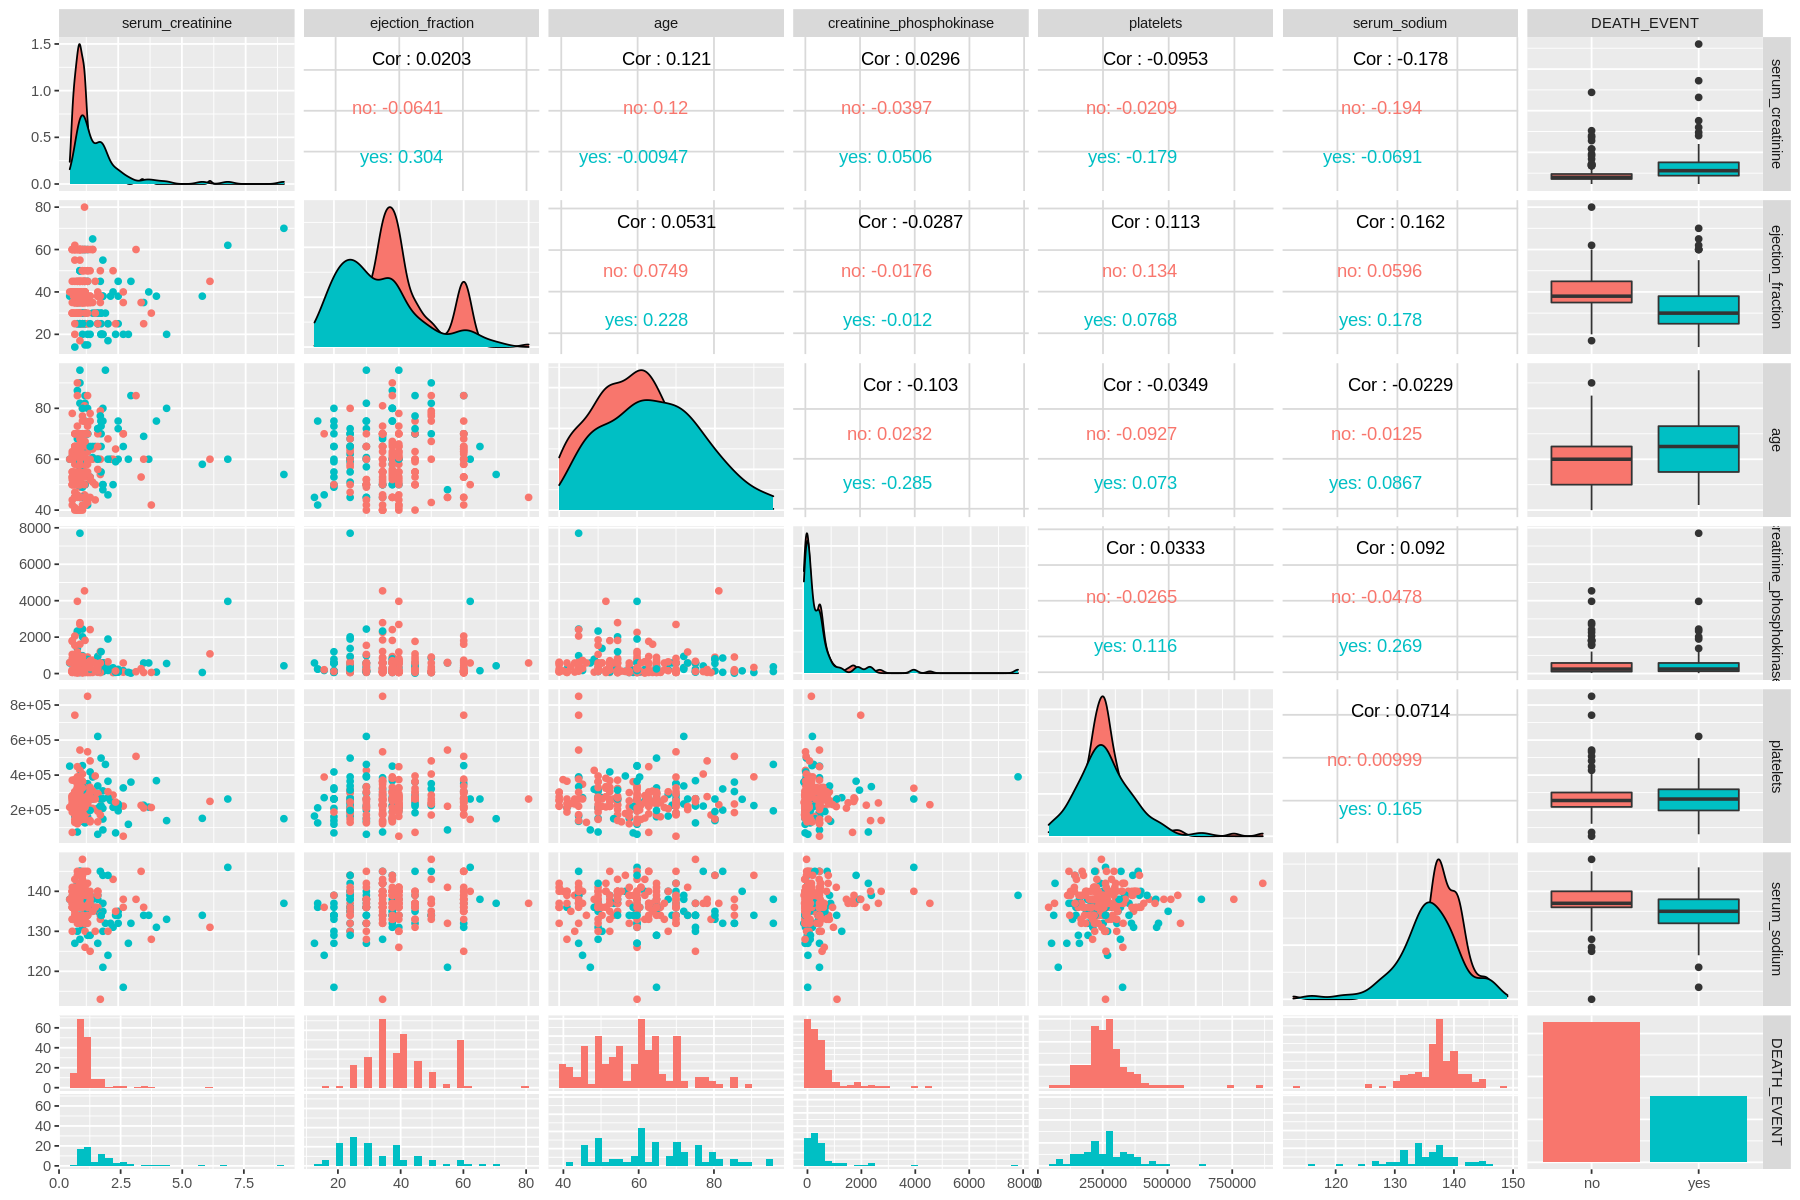

In [20]:
heart_failure_select <- heart_failure_train %>% 
                        select(serum_creatinine, ejection_fraction, age, creatinine_phosphokinase, platelets,
                               serum_sodium, DEATH_EVENT)

ggpairs(heart_failure_select, ggplot2::aes(colour=DEATH_EVENT))

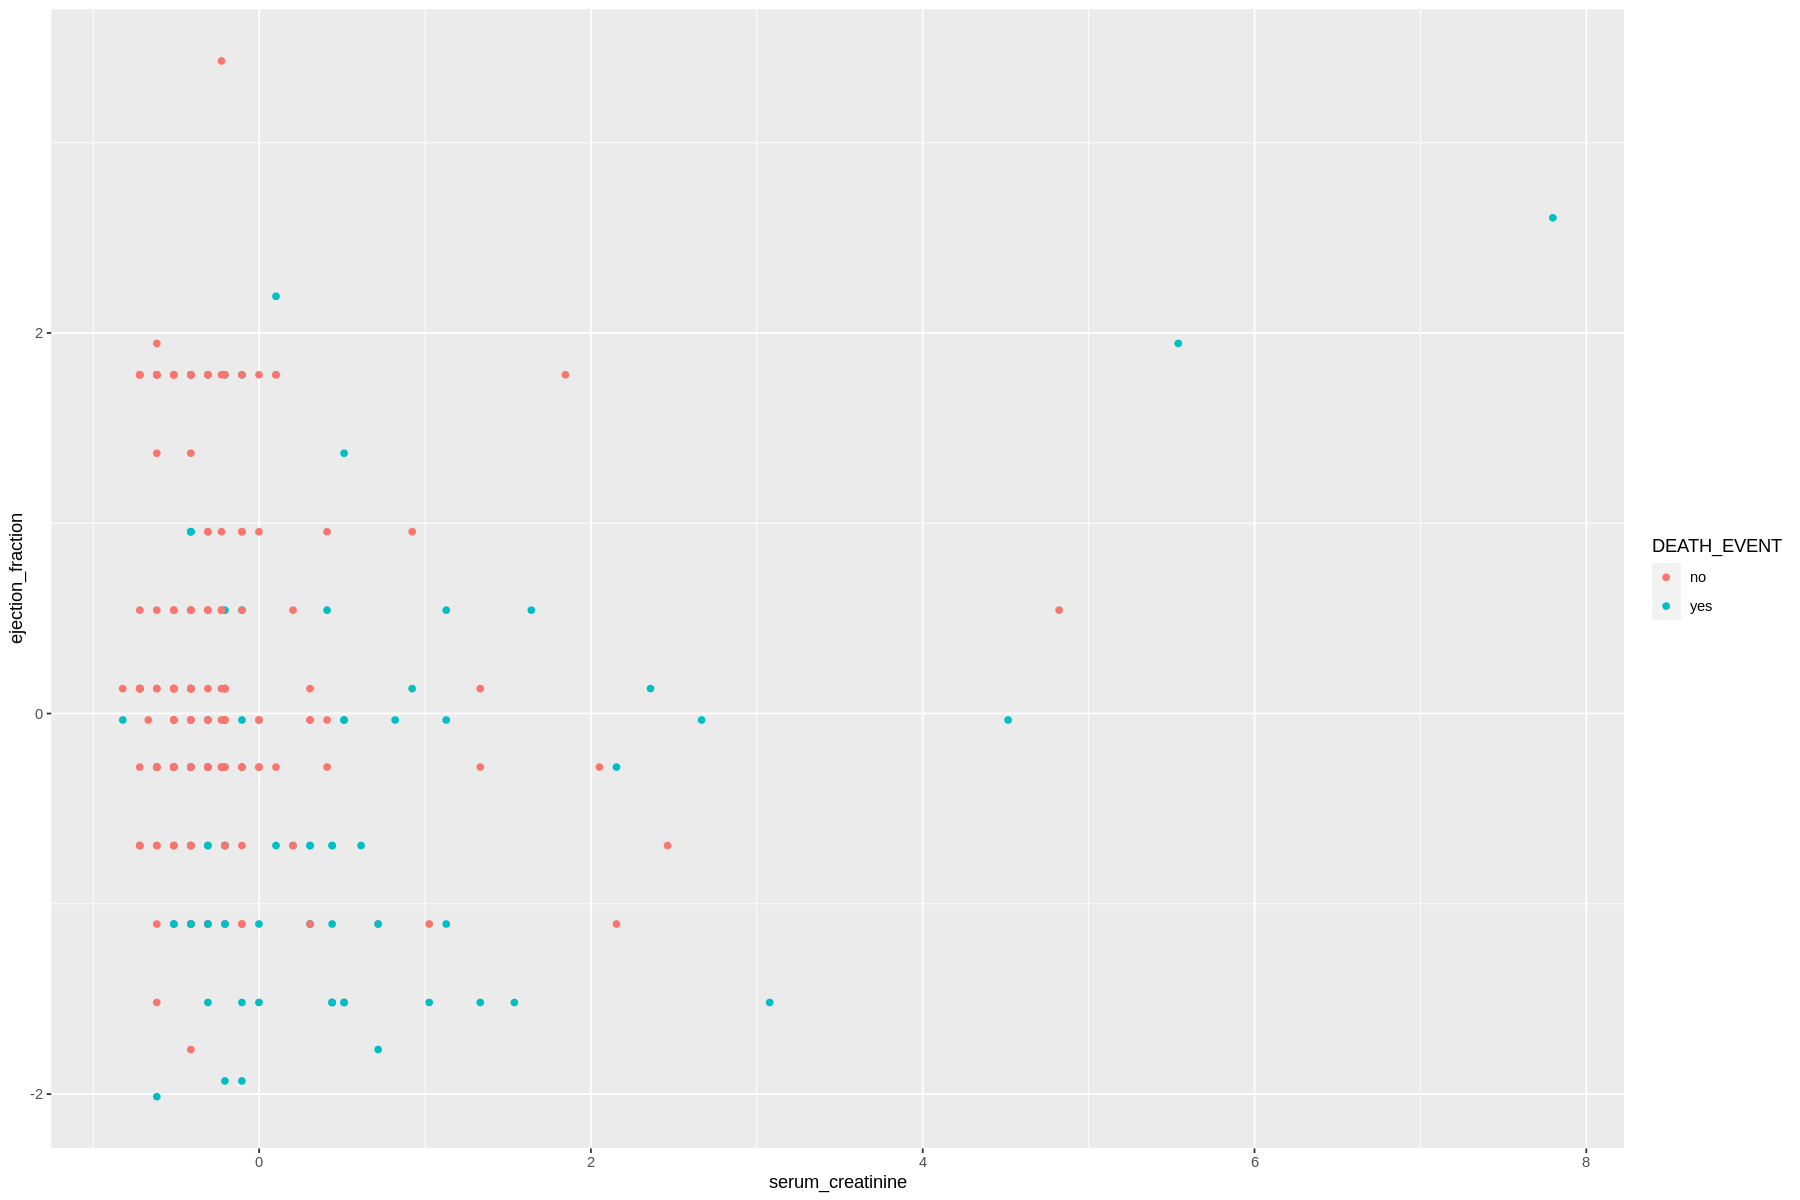

In [21]:
# data(heart)
# ggpairs(flea, columns = 2:4, ggplot2::aes(colour=species))

#?ggpairs

# colnames(heart_failure_train)

heart_failure_recipe <- recipe(DEATH_EVENT ~ serum_creatinine + ejection_fraction, data = heart_failure_train) %>%
                        step_scale(all_predictors()) %>%
                        step_center(all_predictors()) %>%
                    prep()




scaled_heart_failure <- bake(heart_failure_recipe, heart_failure_train)
#scaled_heart_failure
cross_val_plot <- ggplot(scaled_heart_failure, aes(x =serum_creatinine, y = ejection_fraction, color = DEATH_EVENT)) +
                    geom_point()
cross_val_plot


In [ ]:
slice(heart_failure_train, 1:6)
tail(heart_failure_train)

In [ ]:
# This code cell shows that scaling is not required since the distance from the first observation to the second has a smaller
# value than the distance from the second observation to the 156th observation. 

dist1 <- heart_failure_train %>%
        slice(1, 2) %>%
        select(ejection_fraction, serum_creatinine) %>%
        dist()
dist1

dist2 <- heart_failure_train %>%
        slice(2, 156) %>%
        select(ejection_fraction, serum_creatinine) %>%
        dist()
dist2


dist3 <- heart_failure_train %>%
        slice(2, 88) %>%
        select(ejection_fraction, serum_creatinine) %>%
        dist()
dist3

dist4 <- heart_failure_train %>%
        slice(2, 45) %>%
        select(ejection_fraction, serum_creatinine) %>%
        dist()
dist4

slice(heart_failure_train, 45)
slice(heart_failure_train, 156)
slice(heart_failure_train, 2)
slice(heart_failure_train, 88)



In [22]:
# Here I have converted the time column from days to months. For total days less than 30 the month is 0. 
# The months are calculated by total days divided by 30 days. 

set.seed(20)

heart_failure_train <- heart_failure_train %>%
                        mutate(month_time = as.integer(time/30)) %>%
                        group_by(month_time, DEATH_EVENT) %>%
                        summarize(n = n())


heart_failure_train


`summarise()` regrouping output by 'month_time' (override with `.groups` argument)



month_time,DEATH_EVENT,n
<int>,<fct>,<int>
0,no,3
0,yes,25
1,no,2
⋮,⋮,⋮
8,no,20
8,yes,1
9,no,6


In [ ]:
set.seed(20)

# In this section we want to find the percentage of patients that survived in each month. 

# I have started on this. Try to complete the task.  

count <- 0
a <- 0
for (i in heart_failure_train[, 1])  {
    if(heart_failure_train[, 2] == "no") {
        count = heart_failure_train$n
        }
    else {
        second = heart_failure_train$n
        a = ((count * 100)/(count + second))
        count = 0
        second = 0
    }
        
        
}
a